## 6.2 Exploring Relationships

### Contents
#### 1. Setting up Notebook
#### 2. Research Questions
#### 3. Exploring Relationships

### 1. Importing Visualization Libraries and Data

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os

In [5]:
# Check matplot version
matplotlib.__version__

'3.8.4'

In [6]:
# Define path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\Advanced Analytics & Dashboard Design\World Happiness Analysis'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','wh_clean.csv'),index_col = False)

#### Research Questions:
1. 	Which countries have the highest and lowest happiness scores?
2.	How does the average happiness score vary across different regions?
3.	What is the average happiness score across all countries?
4.	Is there a trend in global happiness over recent years? Are happiness levels generally increasing or decreasing?
5.	Are there countries where happiness scores have consistently improved or declined over time?
6.	What factors correlate most strongly with happiness scores globally?
7.	How does GDP per capita relate to happiness? Are wealthier countries generally happier?
8.	Do countries with higher social support programs have higher happiness scores?
9.	What is the relationship between life expectancy and happiness scores?
10.	Are there specific countries where high life expectancy does not correspond to high happiness (or vice versa)?
11.	Is there a connection between freedom_to_make_life_choices and happiness?
12.	Do people in countries with higher corruption levels report lower happiness?
13.	How have happiness scores changed year-over-year for specific countries or regions?
14.	How does the distribution of happiness scores look? (e.g., skewed, normal, etc.)
15.	Are there common traits among the least happy countries?


### Exploring Relationships

#### Basic Checks

In [11]:
df.shape

(1367, 11)

In [12]:
df.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [13]:
df = df.drop(columns ='Unnamed: 0')

#### QUESTION 2
##### Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [15]:
df_sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices', 'generosity','perceptions_of_corruption']]

In [16]:
df_sub.corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.723810,0.648155,0.682343,0.569458,0.082345,0.414853
gdp_per_capita,0.723810,1.000000,0.522092,0.564938,0.439453,-0.153904,0.337403
social_support,0.648155,0.522092,1.000000,0.561144,0.364927,-0.006385,0.147244
healthy_life_expectancy,0.682343,0.564938,0.561144,1.000000,0.261369,0.025920,0.256171
freedom_to_make_life_choices,0.569458,0.439453,0.364927,0.261369,1.000000,0.157050,0.433540
generosity,0.082345,-0.153904,-0.006385,0.025920,0.157050,1.000000,0.224344
perceptions_of_corruption,0.414853,0.337403,0.147244,0.256171,0.433540,0.224344,1.000000


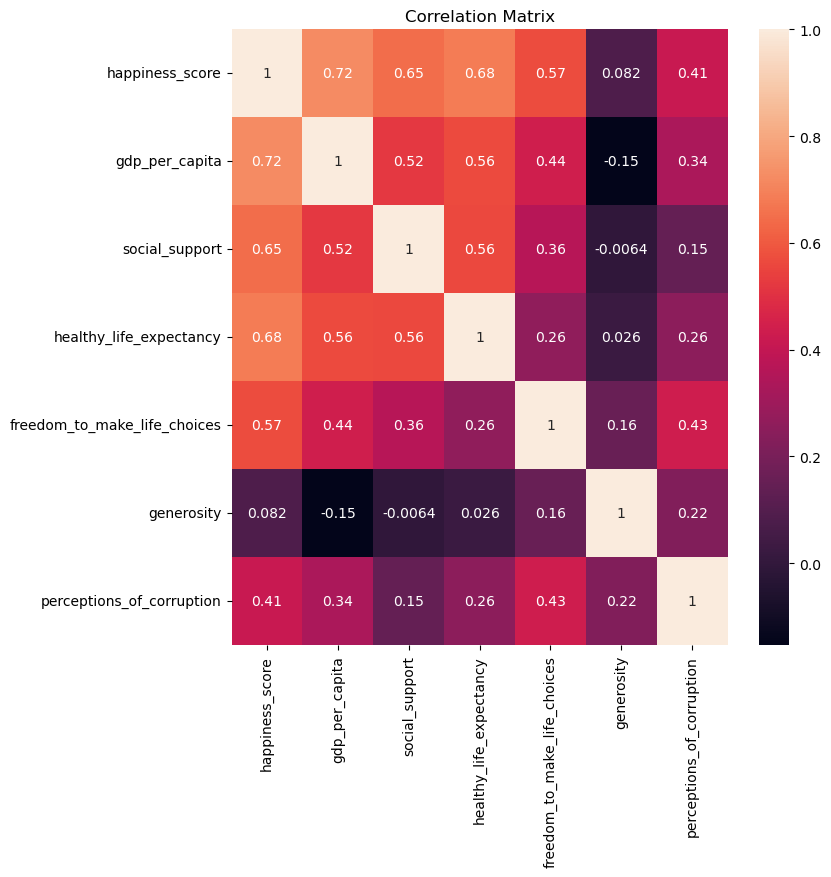

In [58]:
# Creating the correlation heatmap in seaborn
f,ax = plt.subplots(figsize=(8,8)) # Creating subplots in matplotlib
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) 
plt.title('Correlation Matrix', fontsize=12)
plt.savefig(os.path.join(path,'02 Data','Prepared Data','Matrix.png'), bbox_inches='tight')


From correlation heat map , we can see that all the factors contribute positively to the happiness score, some variables have strong correlation , someothers have weak. gdp_per_capita has the strongest positive corelation with happiness_score and generosity has the weakest relation.

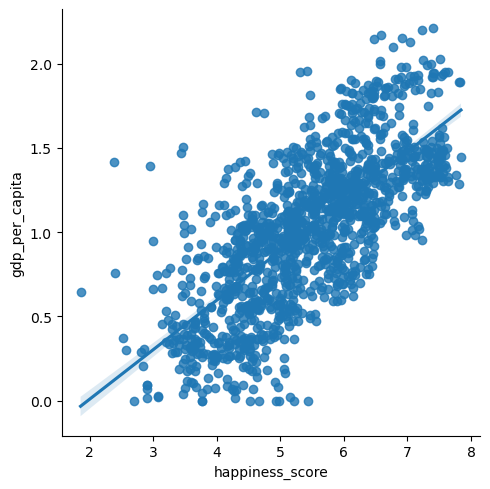

In [24]:
# Create a scatterplot for the "happiness score" and "gdp per capita" columns in seaborn which have strong coorelation as per the heat map

sns.lmplot(x = 'happiness_score' , y = 'gdp_per_capita' , data = df_sub)


From the scatterplot we can see that , there is a stong postive correlation between  happiness_score and gdp_per_capita. The trend line is very steep and many data points cluster near the trend line with very few exceptions.

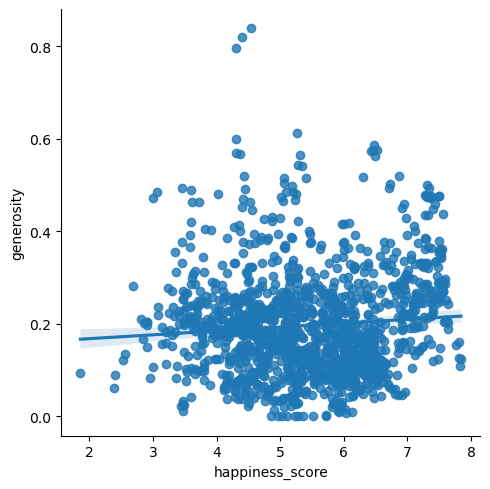

In [28]:
# Create a scatterplot for the "happiness score" and "generosity" columns in seaborn which have weak coorelation as per the heat map

sns.lmplot(x = 'happiness_score' , y = 'generosity' , data = df_sub)


From the scatterplot we can see that, there is a weak correlation between happiness_score and generosity. The trend line is almost horizontal.  There is large variation among data points.  Even when generosity is less than 0.2, happiness_score is more than 4.

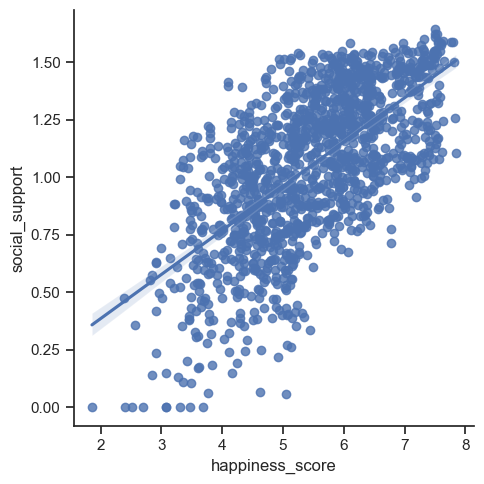

In [260]:
# Create a scatterplot for the "happiness score" and "social_support" columns in seaborn which have weak coorelation as per the heat map

sns.lmplot(x = 'happiness_score' , y = 'social_support' , data = df_sub)

From the scatterplot we can see that , there is a stong postive correlation between  happiness_score and social_support. The trend line is steep and many data points cluster near the trend line with few exceptions.

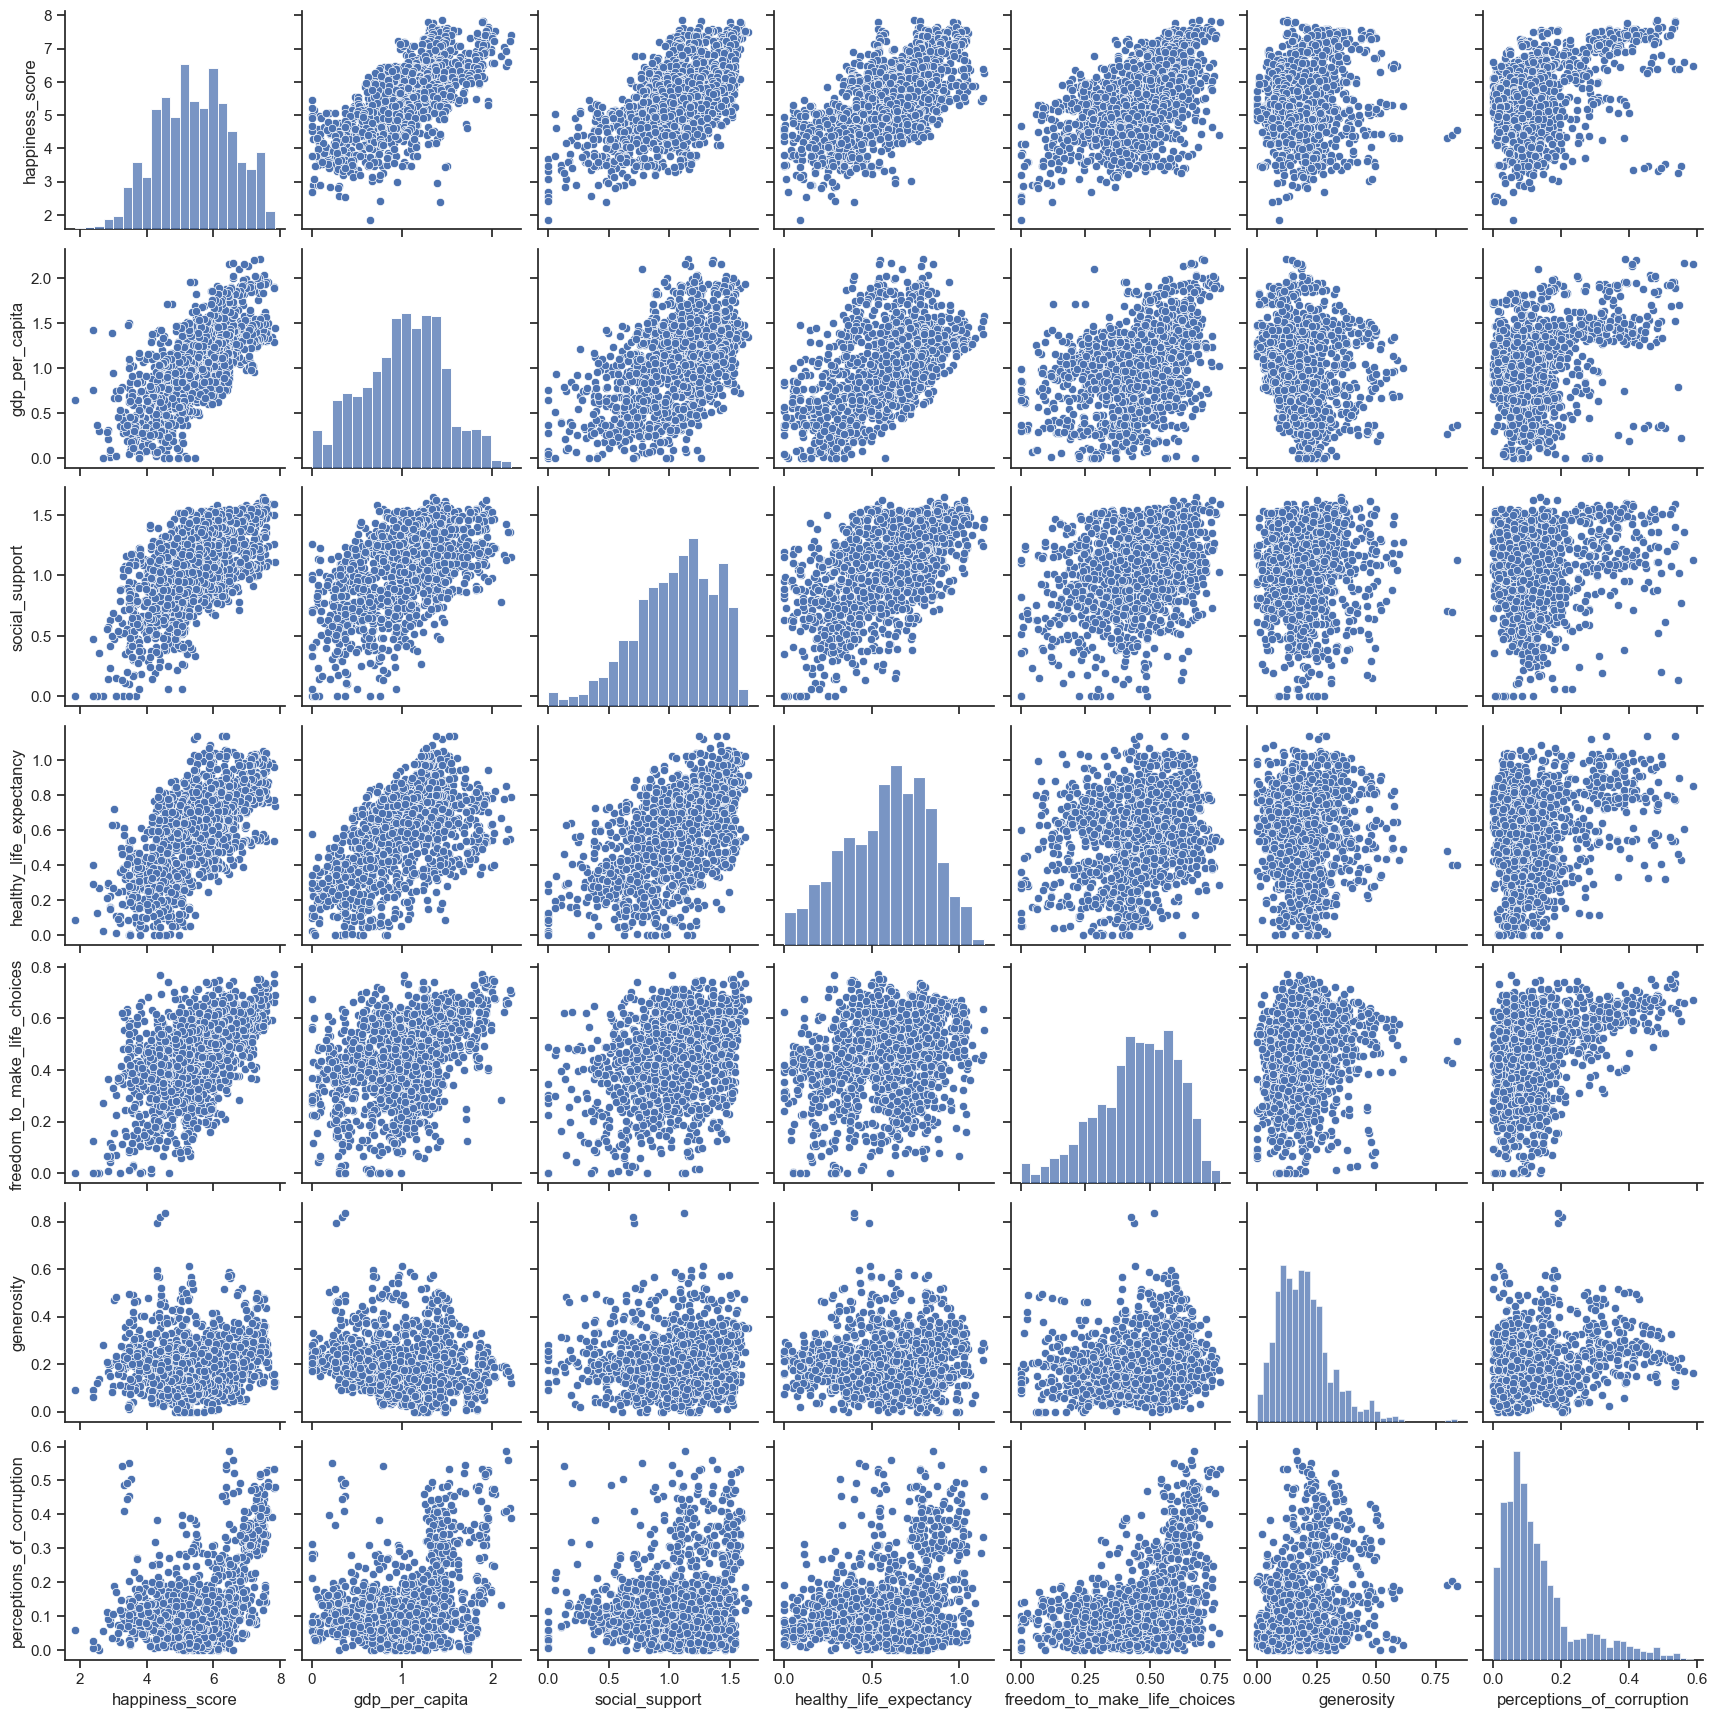

In [258]:
# Creating a  pair plot to see the relation between different variables

pp = sns.pairplot(df_sub)

From the pair plot, we can see that happiness_score has positive co-relation with gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices variables. generosity variable has no significant trend and shows no relationship with happiness_score. The variable 'perceptions_of_corruption' has no influence over happiness_score upto certain level, once the value is over 0.3 , we can see increase in happiness_score.

<Axes: xlabel='happiness_score', ylabel='Count'>

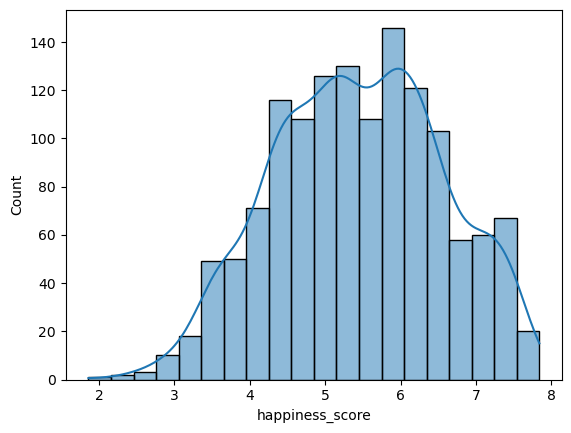

In [32]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['happiness_score'], bins = 20, kde = True)

In [238]:
df.loc[df['happiness_score'] < 4 , 'happiness_level'] = 'Low'
df.loc[(df['happiness_score'] > 4)  & (df['happiness_score'] < 6) , 'happiness_level'] = 'Middle'
df.loc[df['happiness_score'] > 6 , 'happiness_level'] = 'High'

In [188]:
df['happiness_level'].value_counts()

happiness_level
Middle    772
High      450
Low       144
Name: count, dtype: int64

In [204]:
df.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'happiness_level'],
      dtype='object')

There are no categorical variables in the dataset so binning the variables and then plotting categorical plot.

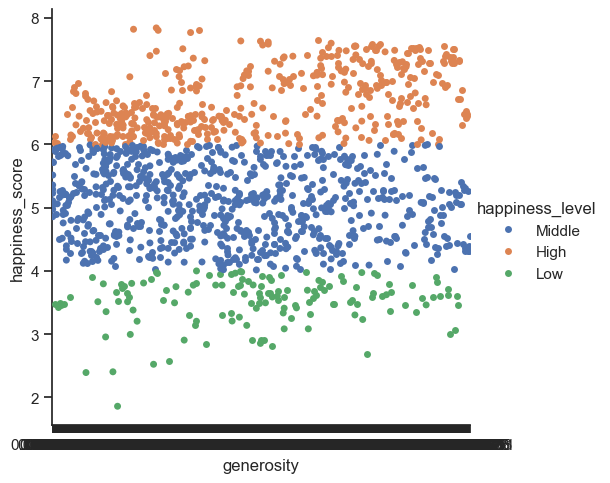

In [226]:
# Create a categorical plot in seaborn using the happiness levels  created above

sns.set(style="ticks")
c = sns.catplot(x="generosity", y="happiness_score",  hue="happiness_level", data=df )

As the df dataframe has only continuous variables, its better to use 'scatterplot' than 'catplot'

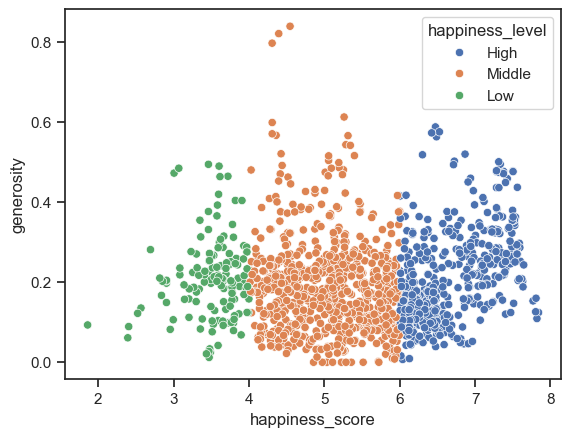

In [228]:
# Creating a scatter plot in seaborn using the happiness level created above

sns.set(style="ticks")
c = sns.scatterplot(y="generosity", x="happiness_score",  hue="happiness_level", data=df )
fig = c.get_figure() 
fig.savefig(os.path.join(path,'04 Analysis', 'generosity.png'))

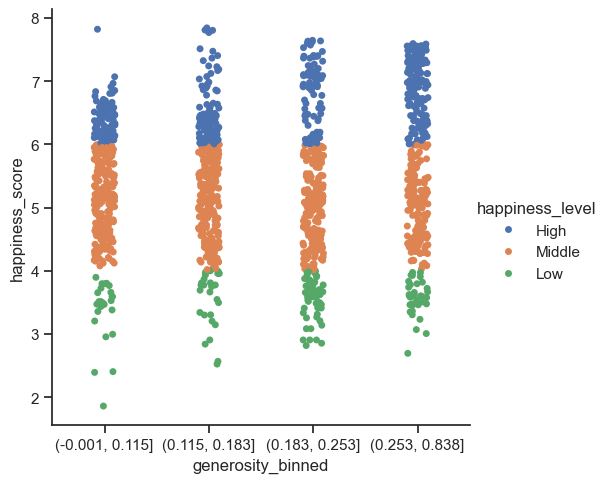

In [244]:
# Binning generosity
df['generosity_binned'] = pd.qcut(df['generosity'], q=4)  # or use `pd.cut` for fixed bins
c = sns.catplot(x="generosity_binned", y="happiness_score", hue="happiness_level", data=df)


We can see that even when the generosity is low, happiness score is high and even when the generosity is high, there are datapoints with low happiness score. Hence generosity is not a strong infuencing factor for happiness score.


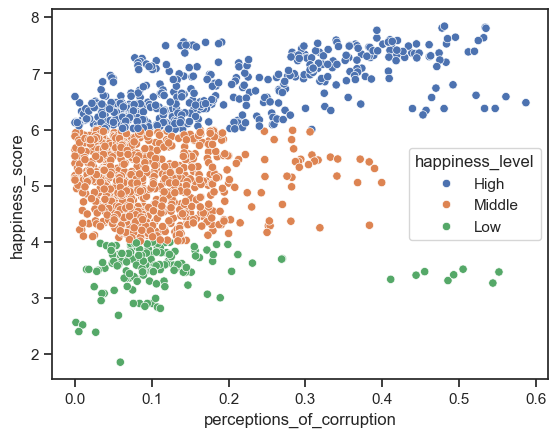

In [230]:
# Creating a scatter plot in seaborn using the happiness level created above

sns.set(style="ticks")
c = sns.scatterplot(x="perceptions_of_corruption", y="happiness_score",  hue="happiness_level", data=df )
fig = c.get_figure() 
fig.savefig(os.path.join(path,'04 Analysis', 'corruption.png'))

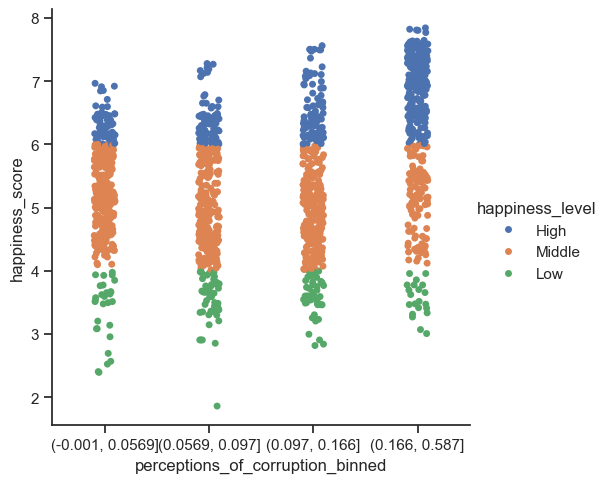

In [242]:
# Binning generosity
df['perceptions_of_corruption_binned'] = pd.qcut(df['perceptions_of_corruption'], q=4)  # or use `pd.cut` for fixed bins
c = sns.catplot(x="perceptions_of_corruption_binned", y="happiness_score", hue="happiness_level", data=df)


We can see that even when the perceptions_of_corruption is low, there are datapoints with high happiness score and even when the perceptions_of_corruption is high, there are datapoints with low happiness score. However when the perceptions_of_corruption  is highest there are many data points with high happiness score.

#### Answering following research questions:
6.	What factors correlate most strongly with happiness scores globally?
- 	'gdp_per_capita' correlates strongly with happiness score followed healthy_life_expectancy and social_support.
7. How does GDP per capita relate to happiness? Are wealthier countries generally happier?
-  From the scatterplot we can see that , there is a stong postive correlation between  happiness_score and gdp_per_capita. The trend line is very    steep and many data points cluster near the trend line with very few exceptions. From the scatter plot we can say that wealthier countries are generally happier.
8. Do countries with higher social support programs have higher happiness scores?
- Social_support influences positively to the happiness_score with a co-relation co-efficient of 0.648155. From the scatter-plot we can see the trend line and many data points clustered near the trend line with few exceptions, proving that countries with higher social support programs have higher happiness scores
9.	What is the relationship between life expectancy and happiness scores?
- life_expectency has a strong positive co-relation with happiness_score.
11.	Is there a connection between freedom_to_make_life_choices and happiness?
- freedom_to_make_life_choices influences positively to the happiness_score with a co-relation co-efficient of  0.569458.
12.	Do people in countries with higher corruption levels report lower happiness?
- We can see that even when the perceptions_of_corruption is low, there are datapoints with high happiness score and even when the perceptions_of_corruption is high, there are datapoints with low happiness score. However when the values of perceptions_of_corruption is in higher range there are many data points with high happiness score. From the plot we can say that corruption is not a significant influencing factor for happiness_score.


#### Hypothesis:
1. As the GDP of the country increases , Happiness_score also increase.
2. Increase in generosity does not increase happiness score.
3. Higher life expectancy is associated with higher happiness scores.